# Stellar Classification
A classifier which classifies a set of parameters into either of Stars, Galaxies and Quasars. From Sloan Digital Sky Survey DR17

Dataset used: Stellar Classification Dataset - SDSS17

https://www.kaggle.com/fedesoriano/stellar-classification-dataset-sdss17

### Context
In astronomy, stellar classification is the classification of stars based on their spectral characteristics. The classification scheme of galaxies, quasars, and stars is one of the most fundamental in astronomy. The early cataloguing of stars and their distribution in the sky has led to the understanding that they make up our own galaxy and, following the distinction that Andromeda was a separate galaxy to our own, numerous galaxies began to be surveyed as more powerful telescopes were built. This datasat aims to classificate stars, galaxies, and quasars based on their spectral characteristics.

### Content of data
The data consists of 100,000 observations of space taken by the SDSS (Sloan Digital Sky Survey). Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar.
1. obj_ID = Object Identifier, the unique value that identifies the object in the image catalog used by the CAS
2. alpha = Right Ascension angle (at J2000 epoch)
3. delta = Declination angle (at J2000 epoch)
4. u = Ultraviolet filter in the photometric system
5. g = Green filter in the photometric system
6. r = Red filter in the photometric system
7. i = Near Infrared filter in the photometric system
8. z = Infrared filter in the photometric system
9. run_ID = Run Number used to identify the specific scan
10. rereun_ID = Rerun Number to specify how the image was processed
11. cam_col = Camera column to identify the scanline within the run
12. field_ID = Field number to identify each field
13. spec_obj_ID = Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class)
14. class = object class (galaxy, star or quasar object)
15. redshift = redshift value based on the increase in wavelength
16. plate = plate ID, identifies each plate in SDSS
17. MJD = Modified Julian Date, used to indicate when a given piece of SDSS data was taken
18. fiber_ID = fiber ID that identifies the fiber that pointed the light at the focal plane in each observation

### References
https://www.kaggle.com/prasadchaskar/steller-classification-with-97-accuracy

https://www.kaggle.com/beyzanks/stellar-classification-98-4-acc-100-auc

## Notebook

### Step 1
Import libraries and the dataset from the csv(comma separated values) file.

In [3]:
# Importing standard libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
df = pd.read_csv("star_classification.csv")

### Step 2
Exploring data for the values we have and if we any problems associated with the data.

In [5]:
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [6]:
# The columns in our data
df.columns

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [8]:
# Checking if we got any missing values in the data.
df.isna().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [9]:
# Based on data only certain columns are significant. Removed columns are the ones displaying IDs,
# which are of little to no importance in out process of making a model.
stellar_df = df[['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'cam_col', 'class', 'redshift', 'plate', 'MJD']]

In [10]:
stellar_df.shape

(100000, 12)

In [11]:
stellar_df.describe()

,alpha,delta,u,g,r,i,z,cam_col,redshift,plate,MJD
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,3.511610,0.576661,5137.009660,55588.647500
std,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1.586912,0.730707,2952.303351,1808.484233
min,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,1.000000,-0.009971,266.000000,51608.000000
25%,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,2.000000,0.054517,2526.000000,54234.000000
50%,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4.000000,0.424173,4987.000000,55868.500000
75%,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5.000000,0.704154,7400.250000,56777.000000
max,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,6.000000,7.011245,12547.000000,58932.000000


### Step 3
Visualising the data for understanding how it is spread out by using differnt plots using the seaborn library.

<AxesSubplot:xlabel='alpha', ylabel='redshift'>

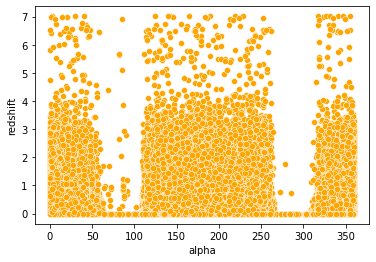

In [12]:
sns.scatterplot(data=stellar_df, x="alpha", y="redshift", color="orange")

<AxesSubplot:xlabel='delta', ylabel='Count'>

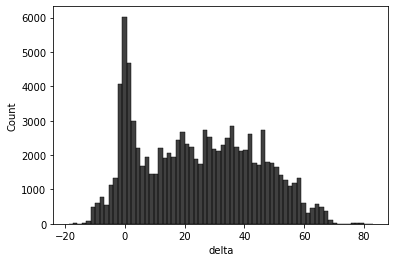

In [13]:
sns.histplot(data=stellar_df, x="delta", color="black")

<AxesSubplot:xlabel='redshift', ylabel='Count'>

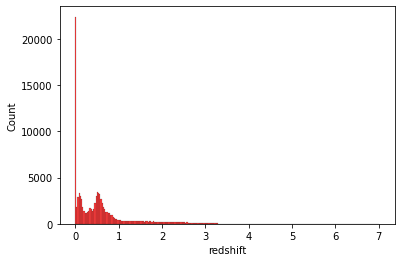

In [14]:
sns.histplot(data=stellar_df, x="redshift", color="r")

### Step 4
Making the training and testing data split based on the 'class' column which is to be predicted.

In [15]:
stellar_df["class"].value_counts()

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

In [16]:
# Modifying the class column to be a value rather than a string for the model
stellar_df["class"] = [0 if i=="STAR" else 1 if i=="QSO" else 2 for i in stellar_df["class"]]

C:\Users\Abhishek\AppData\Local\Temp\ipykernel_10116\2087777930.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stellar_df["class"] = [0 if i=="STAR" else 1 if i=="QSO" else 2 for i in stellar_df["class"]]


In [17]:
# X is the set of features based on which y (the class) is to be predicted/classified.
X = stellar_df.drop('class',axis=1)
y = stellar_df['class']
print(X.shape)
print(y.shape)

(100000, 11)
(100000,)


In [18]:
# Making the test size to 25% of total dataset and setting random state to 
# a fixed value will guarantee that same sequence of random numbers are generated each time we run the code. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 7)

### Step 5
Preprocess the data and try different models (Random forest & Support Vector Machine here) while aiming for getting the highest accuracy.

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [20]:
# Random forest classifier
from sklearn.ensemble import RandomForestClassifier

r_forest = RandomForestClassifier()
r_forest.fit(X_train,y_train)

predicted = r_forest.predict(X_test)
score = r_forest.score(X_test, y_test)
rf_score = np.mean(score)

In [21]:
print(f"Accuracy Achieved by Random forest classifier: {rf_score*100} %")

Accuracy Achieved by Random forest classifier: 97.916 %


In [22]:
# SVM - Support Vector Machine Classifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

svem = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svem.fit(X_train,y_train)

predicted = svem.predict(X_test)
score = svem.score(X_test, y_test)
svem_score = np.mean(score)

In [23]:
print(f"Accuracy Achieved in SVM: {svem_score*100} %")

Accuracy Achieved in SVM: 95.87599999999999 %


In [24]:
# Neural Network
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1, max_iter=1000)
nn.fit(X_train, y_train)
score = nn.score(X_test, y_test)
nn_score = np.mean(score)

In [25]:
print(f"Accuracy Achieved in Neural Network: {nn_score*100} %")

Accuracy Achieved in Neural Network: 96.848 %


In [26]:
# Neural Network with different hidden layer size
from sklearn.neural_network import MLPClassifier
nn2 = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(6, 3), random_state=1, max_iter=1000)
nn2.fit(X_train, y_train)
score = nn2.score(X_test, y_test)
nn2_score = np.mean(score)

c:\users\abhishek\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [27]:
print(nn2_score*100)

97.15599999999999


In [28]:
model_scores=[rf_score, nn2_score, svem_score]
for i in model_scores:
    print(f"Score: {i}")

Score: 0.97916
Score: 0.97156
Score: 0.95876


## Result
We find that our Random forest classifier performs the best that is 97.92%

In [29]:
print(X_train[19])
class_dict = {
  0: "STAR",
  1: "QSO",
  2: "GALAXY"
}
prediction = r_forest.predict([X_train[1]])
print(f"Predicted class: {class_dict[prediction[0]]}")

[-1.43480437  0.26044538 -0.01418932 -0.0041264   0.03091502  0.19792942
  0.01535686  0.93791797 -0.78959446 -0.9124824  -0.83370216]
Predicted class: QSO


In [30]:
# Taking above example and changing values 
exp_data = [0.5284327 , -1.12519075,  0.19588647,  0.0443259 ,  0.28241633,
        0.14658281,  0.04755141,  0.40811594,  2.92790288, -0.27501299,
        0.11645269]

prediction = r_forest.predict([exp_data])
print(f"Predicted class: {class_dict[prediction[0]]}")

Predicted class: QSO


## Save and load model

In [31]:
import pickle
filename = 'rf_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(r_forest, file)

In [32]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(f"Resultant Accuracy from saved model: {result*100} %")

Resultant Accuracy from saved model: 97.916 %


In [35]:
y_pred=loaded_model.predict(X_test)
y_pred

array([1, 2, 2, ..., 2, 0, 2], dtype=int64)

## Result Visualization
By Building a confusion Matrix.

In [36]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

[[ 5368     0     2]
 [    2  4466   322]
 [   27   168 14645]]


Text(0.5, 1.0, 'Confusion Matrix')

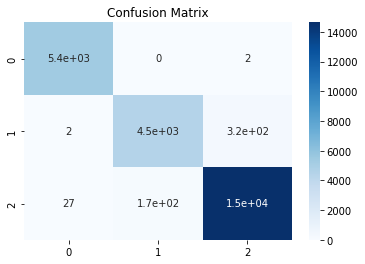

In [49]:
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix')

# End of notebook